In [1]:
from keras.models import Sequential, load_model # type of model 
from keras.layers import Dense, Activation, Conv2D,AveragePooling2D, Dropout, Flatten
from keras.optimizers import sgd, Adadelta
from keras.datasets import mnist
from keras.losses import categorical_crossentropy
from keras.utils import to_categorical
import numpy as np

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()



11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test  = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train = x_train/255
x_test  = x_test/255
y_train = to_categorical(y_train,10)
y_test  = to_categorical(y_test ,10)

In [0]:
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5),activation=None, use_bias=False, input_shape=(28, 28, 1)))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Conv2D(12, kernel_size=(5, 5), use_bias=False, activation=None))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10,use_bias=False))
model.add(Activation('softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         150       
_________________________________________________________________
average_pooling2d_1 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 12)          1800      
_________________________________________________________________
average_pooling2d_2 (Average (None, 4, 4, 12)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1920      
_________________________________________________________________
acti

In [0]:
model.compile(loss=categorical_crossentropy,optimizer=Adadelta(),metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=15, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 18s 293us/step - loss: 0.3312 - acc: 0.9067
Epoch 2/10
60000/60000 [==============================] - 17s 291us/step - loss: 0.3259 - acc: 0.9082
Epoch 3/10
60000/60000 [==============================] - 17s 290us/step - loss: 0.3224 - acc: 0.9092
Epoch 4/10
60000/60000 [==============================] - 17s 290us/step - loss: 0.3187 - acc: 0.9108
Epoch 5/10
60000/60000 [==============================] - 17s 289us/step - loss: 0.3152 - acc: 0.9115
Epoch 6/10
60000/60000 [==============================] - 17s 288us/step - loss: 0.3137 - acc: 0.9121
Epoch 7/10
60000/60000 [==============================] - 17s 288us/step - loss: 0.3117 - acc: 0.9131
Epoch 8/10
60000/60000 [==============================] - 17s 290us/step - loss: 0.3105 - acc: 0.9135
Epoch 9/10
60000/60000 [==============================] - 17s 287us/step - loss: 0.3088 - acc: 0.9136
Epoch 10/10
60000/60000 [==============================] - 17s 287us/step - loss: 

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.30370973167419435
Test accuracy: 0.9143


In [0]:
model.save('LeNetTrainedAvgPool+Softmax.h5')

In [0]:
from google.colab import files
files.download("LeNetTrainedAvgPool+Softmax.h5")

In [0]:
!ls

LeNetTrained220219.h5  sample_data


In [0]:
w=model.layers[2].get_weights()[0]
#print (w.shape)
N = 12;
K = 5;
W = np.zeros((N*K*K,1))
L = 6
for i in range(0 , N):
  for l in range(0 , L):
    for j in range(0, K):
      for k in range(0, K):
        if (int(256*w[j][k][l][i])>=0):
          print ('{:032b}'.format(int(256*w[j][k][l][i])))
        else:
          print ('{:032b}'.format(4294967296+int(256*w[j][k][l][i])))

11111111111111111111111111001100
00000000000000000000000000011110
00000000000000000000000000000010
00000000000000000000000000000000
11111111111111111111111111110100
11111111111111111111111110111110
00000000000000000000000001000011
00000000000000000000000000110010
00000000000000000000000000000011
11111111111111111111111111101000
00000000000000000000000000011111
11111111111111111111111111001011
11111111111111111111111110101100
11111111111111111111111111101111
00000000000000000000000000010111
00000000000000000000000001011101
00000000000000000000000000001001
00000000000000000000000000110101
11111111111111111111111111111010
00000000000000000000000000100000
00000000000000000000000000001110
11111111111111111111111110100011
11111111111111111111111111000100
11111111111111111111111111011011
00000000000000000000000001000101
11111111111111111111111111110100
11111111111111111111111111111101
00000000000000000000000000010100
00000000000000000000000000000110
11111111111111111111111110011100
1111111111

In [0]:
('{:032b}'.format(int(256*0)))

'00000000000000000000000000000000'

In [0]:
w=model.layers[0].get_weights()[0]
#print (w.shape)
N = 6;
K = 5;
W = np.zeros((N*K*K,1))
L = 1
for i in range(0 , N):
  for j in range(0 , K):
    for k in range(0, K):
      for l in range(0, L):
        if (256*w[j][k][l][i]>=0):
          print ((int(256*w[j][k][l][i])))
        else:
          print ((int(256*w[j][k][l][i])))

56
141
56
13
146
117
204
143
144
53
-81
90
33
103
21
-315
-234
-88
-130
-148
8
-131
-215
-222
-63
-121
-16
63
103
96
-26
-23
-51
-1
90
-102
-36
-140
40
147
-214
-39
0
140
43
-72
-3
36
68
25
-144
27
13
45
7
36
179
120
-8
-34
160
61
-167
-105
-71
-68
-188
-176
-1
120
-6
-50
134
82
-3
33
2
-23
30
117
-38
85
-32
-20
1
-9
29
-33
27
-140
141
-2
-120
229
-52
-4
22
-142
108
-52
5
-33
-31
56
11
94
46
-20
73
-66
-40
25
124
16
-208
38
179
1
-62
-232
24
177
55
-179
-143
-32
-53
-159
-123
-186
25
123
-12
-148
-230
53
144
233
39
-43
-80
57
145
106
62
-3
-82
-3
90
63


In [0]:
"{:032b}".format(4294967296-0)

'100000000000000000000000000000000'

In [0]:
print (w)

[[[[ 0.01831826 -0.17230354  0.11950998 -0.12478443  0.3485809
     0.4975773 ]]

  [[ 0.03566474 -0.0834679  -0.05968031  0.12410672  0.15526605
     0.53469896]]

  [[ 0.3586788   0.04103267 -0.4109946   0.17619911 -0.05416659
     0.03118653]]

  [[ 0.46077895  0.11338079 -0.3940225   0.5314671   0.09384311
    -0.36468995]]

  [[ 0.33148274  0.21497926 -0.17518283  0.29845706  0.04800419
    -0.43569744]]]


 [[[ 0.30331674 -0.13870773  0.5024923  -0.14729305  0.300572
     0.7653937 ]]

  [[ 0.38204327 -0.06051724  0.67325175 -0.04427876  0.28309706
     0.2940562 ]]

  [[ 0.22548926  0.10298096  0.19380823  0.12852214  0.20709385
    -0.39168042]]

  [[ 0.24168214  0.2856535  -0.05968998  0.34990695  0.42770863
    -0.55640835]]

  [[ 0.18410175  0.36649147  0.07229933  0.36742243  0.13078918
    -0.44607493]]]


 [[[-0.012024   -0.16826919  0.18663856 -0.3067096   0.1343116
     0.44504786]]

  [[ 0.0976984  -0.09688265  0.7234299  -0.24357796  0.21844473
    -0.00382929]]

  [[

In [0]:
w=model.layers[2].get_weights()[0]
print (w.shape)
N = 6
K = 5
W = np.zeros((N*K*K,1))
L = 12
for i in range(0 , L):
  for j in range(0 , K):
    for k in range(0, K):
      for l in range(0, N):
        if (w[j][k][l][i]>0):
          print ('{:032b}'.format(int(256*w[j][k][l][i])))
        else:
          print ('{:032b}'.format(4294967296+int(256*w[j][k][l][i])))

(5, 5, 6, 12)
11111111111111111111111111110110
11111111111111111111111111111001
00000000000000000000000000010001
00000000000000000000000000000100
00000000000000000000000000000101
00000000000000000000000000000100
00000000000000000000000000011100
00000000000000000000000000001010
11111111111111111111111111101011
11111111111111111111111111100001
00000000000000000000000000100101
00000000000000000000000000010111
11111111111111111111111111110010
11111111111111111111111111100101
11111111111111111111111111111011
11111111111111111111111111110110
00000000000000000000000000011001
00000000000000000000000000100110
11111111111111111111111111110101
100000000000000000000000000000000
11111111111111111111111111111001
11111111111111111111111111111100
00000000000000000000000000000001
00000000000000000000000000000001
11111111111111111111111111111111
11111111111111111111111111100010
00000000000000000000000000001101
00000000000000000000000000011001
11111111111111111111111111100010
1111111111111111111111111111

In [0]:
w=model.layers[5].get_weights()[0]

In [0]:
w.shape

(192, 10)

In [0]:
N = 192;
K = 10;
for i in range(0 , 10):
  for j in range(0 , 192):
    if (int(256*w[j][i])>=0):
      print ('{:032b}'.format(int(256*w[j][i])))
    else:
      print ('{:032b}'.format(4294967296+int(256*w[j][i])))


00000000000000000000000000100001
00000000000000000000000000000111
00000000000000000000000001011110
00000000000000000000000000111010
11111111111111111111111110111001
11111111111111111111111110010010
11111111111111111111111111011110
11111111111111111111111111111000
00000000000000000000000000000010
00000000000000000000000000000000
11111111111111111111111110101001
00000000000000000000000001000011
11111111111111111111111111100011
00000000000000000000000000100001
00000000000000000000000001001010
00000000000000000000000001110110
11111111111111111111111110101001
11111111111111111111111111011111
11111111111111111111111111100011
00000000000000000000000000100100
00000000000000000000000000000111
11111111111111111111111111101010
11111111111111111111111101111000
11111111111111111111111111010101
11111111111111111111111110001101
00000000000000000000000011001111
00000000000000000000000001001001
00000000000000000000000001010011
11111111111111111111111110110100
11111111111111111111111111001010
0000000000

In [0]:
w = np.reshape(x_train[7],(28,28))
w.shape

(28, 28)

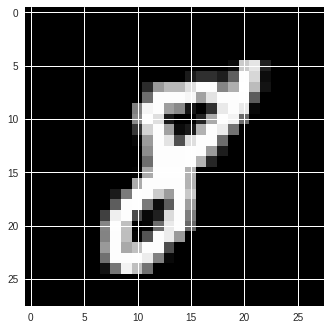

In [0]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(w,cmap='gray')


In [0]:
N = 28;
K = 28;
for i in range(0 , N):
  for j in range(0 , K):
    if (int(256*w[j][i])>=0):
      print ('{:032b}'.format(int(256*w[j][i])))
    else:
      print ('{:032b}'.format(4294967296+int(256*w[j][i])))


00000000000000000000000000000000
00000000000000000000000000000000
00000000000000000000000000000000
00000000000000000000000000000000
00000000000000000000000000000000
00000000000000000000000000000000
00000000000000000000000000000000
00000000000000000000000000000000
00000000000000000000000000000000
00000000000000000000000000000000
00000000000000000000000000000000
00000000000000000000000000000000
00000000000000000000000000000000
00000000000000000000000000000000
00000000000000000000000000000000
00000000000000000000000000000000
00000000000000000000000000000000
00000000000000000000000000000000
00000000000000000000000000000000
00000000000000000000000000000000
00000000000000000000000000000000
00000000000000000000000000000000
00000000000000000000000000000000
00000000000000000000000000000000
00000000000000000000000000000000
00000000000000000000000000000000
00000000000000000000000000000000
00000000000000000000000000000000
00000000000000000000000000000000
00000000000000000000000000000000
0000000000

1
[[1.3554360e-14 9.9999976e-01 1.9084543e-07 2.8807767e-14 5.4092401e-18
  2.8532938e-13 2.3581121e-13 9.4232142e-13 6.0572566e-24 1.1264836e-25]]


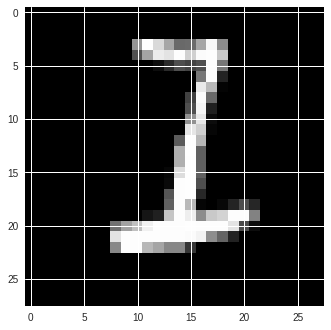

In [0]:
w = np.reshape(x_train[5876],(28,28))
p = model.predict(np.reshape(w,(1,28,28,1)))
print(np.argmax(p))
import matplotlib.pyplot as plt
print(p)
imgplot = plt.imshow(w,cmap='gray')
